In [2]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_parquet("../data/external/prices.parquet",engine="fastparquet")

## Aperçu des données

In [4]:
df

,id,type,product_code,product_name,category_tag,labels_tags,origins_tags,price,price_is_discounted,price_without_discount,...,location_osm_address_postcode,location_osm_address_city,location_osm_address_country,location_osm_address_country_code,location_osm_lat,location_osm_lon,location_website_url,location_source,location_created,location_updated
0,42629,PRODUCT,3560070283484,None,None,None,None,1.25,False,NaN,...,75012,Paris,France,FR,48.85,2.37,None,None,2024-01-16 18:29:47.461589,2024-08-25 13:41:04.572275
1,42630,PRODUCT,3560070206469,None,None,None,None,1.99,False,NaN,...,75012,Paris,France,FR,48.85,2.37,None,None,2024-01-16 18:29:47.461589,2024-08-25 13:41:04.572275
2,39637,PRODUCT,3123930711758,None,None,None,None,3.60,False,NaN,...,17470,Aulnay,France,FR,46.03,-0.35,None,None,2024-10-19 08:12:54.613170,2024-10-19 08:12:55.036233
3,39573,PRODUCT,3500390010247,None,None,None,None,19.95,False,NaN,...,38100,Grenoble,France,FR,45.18,5.73,None,None,2023-12-24 10:09:56.269605,2024-09-01 10:44:35.488131
4,33784,PRODUCT,8033976484743,None,None,None,None,2.99,False,NaN,...,91026,Mazara del Vallo,Italia,IT,37.65,12.60,None,None,2024-08-26 13:54:56.009100,2024-08-26 17:59:56.261823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132435,146059,PRODUCT,0077260114884,RUSSELL STOVER SUGAR FREE MINT PATTIES MINI GU...,None,None,None,7.49,False,NaN,...,94040,Mountain View,United States,US,37.38,-122.08,None,None,2025-10-04 05:26:18.138997,2025-10-04 06:12:55.798794
132436,147730,PRODUCT,3661112055981,ALLUMETTES BACON TRADILEGE 200G,None,None,None,1.74,False,NaN,...,66000,Perpignan,France,FR,42.69,2.88,None,None,2025-01-03 16:36:41.714822,2025-01-03 16:36:53.257390
132437,147726,PRODUCT,3248830000327,PATE FEUIL PB GOURMANDE 280G,None,None,None,4.26,False,NaN,...,66000,Perpignan,France,FR,42.69,2.88,None,None,2025-01-03 16:36:41.714822,2025-01-03 16:36:53.257390
132438,148107,PRODUCT,3154140067007,MAPED TAILLE CRAYON METAL X1,None,None,None,1.50,False,NaN,...,38000,Grenoble,France,FR,45.19,5.71,None,None,2023-12-27 11:49:12.144098,2024-07-20 18:17:58.227203


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132440 entries, 0 to 132439
Data columns (total 48 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   id                                 132440 non-null  int64         
 1   type                               132440 non-null  object        
 2   product_code                       126582 non-null  object        
 3   product_name                       74096 non-null   object        
 4   category_tag                       5858 non-null    object        
 5   labels_tags                        3523 non-null    object        
 6   origins_tags                       5573 non-null    object        
 7   price                              132440 non-null  float64       
 8   price_is_discounted                132440 non-null  bool          
 9   price_without_discount             5734 non-null    float64       
 10  discount_type       

## Valeurs manquantes

In [6]:
def noneSumCalc(df: pd.DataFrame):
    dfNone = pd.DataFrame({"columns": pd.Series(dtype='str'),"noneSum": pd.Series(dtype='float')})
    for i in df:
        colSum = df[f"{i}"].isna().sum()
        dfSize = df.shape[0]
        noneSum = colSum / dfSize
        new_row = pd.DataFrame([{"columns": i, "noneSum": noneSum}])
        dfNone = pd.concat([dfNone, new_row], ignore_index=True)
    return dfNone

In [7]:
dfNone = noneSumCalc(df)

In [8]:
dfNone.sort_values('noneSum', ascending=False)

,columns,noneSum
44,location_website_url,1.00
45,location_source,1.00
10,discount_type,0.98
5,labels_tags,0.97
6,origins_tags,0.96
9,price_without_discount,0.96
4,category_tag,0.96
11,price_per,0.96
29,proof_receipt_price_total,0.95
28,proof_receipt_price_count,0.95


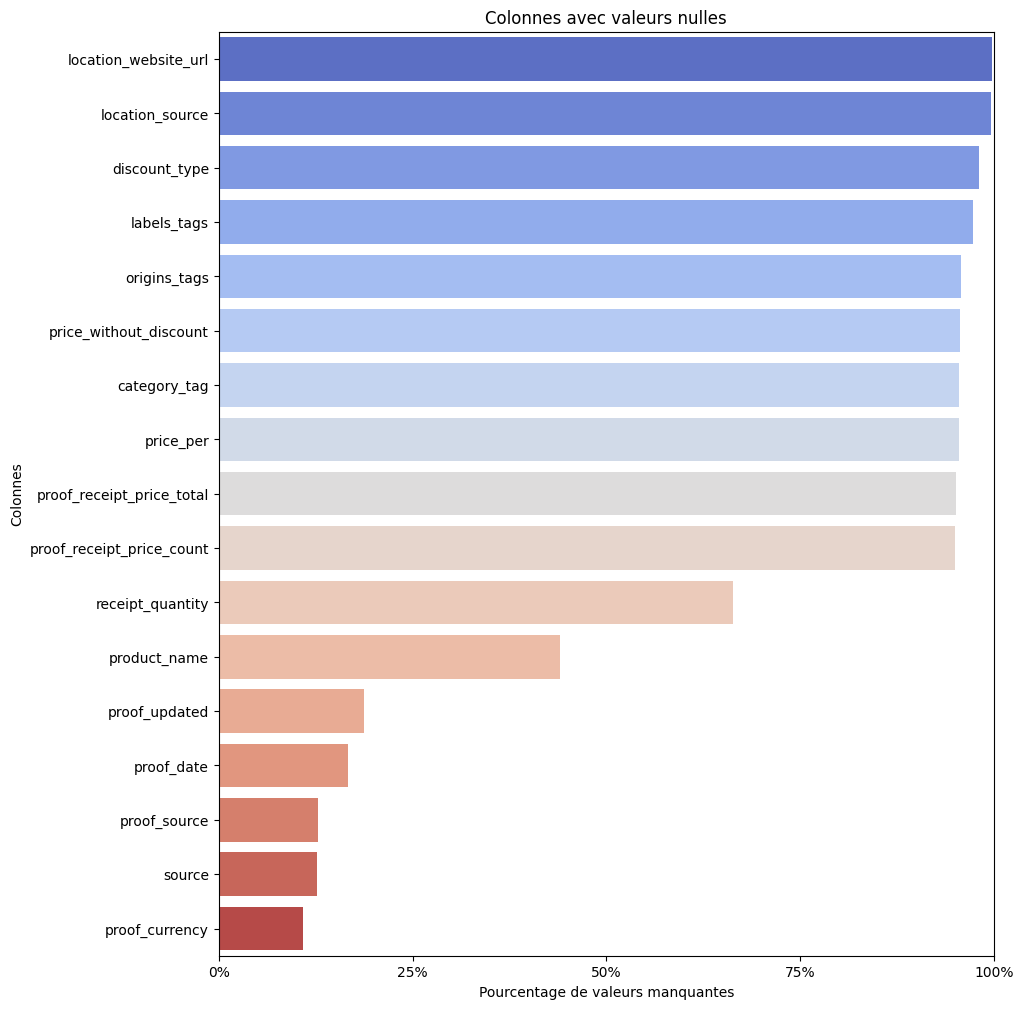

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

dfNone_sorted = dfNone.sort_values('noneSum', ascending=False)
dfNone_plot = dfNone_sorted[dfNone_sorted['noneSum'] > 0.09]

plt.figure(figsize=(10,12))
sns.barplot(x='noneSum', y='columns', data=dfNone_plot, hue='columns', palette='coolwarm')
plt.xlabel("Pourcentage de valeurs manquantes")
plt.ylabel("Colonnes")
plt.title("Colonnes avec valeurs nulles")
plt.xlim(0,1)
plt.xticks([0,0.25,0.5,0.75,1], ['0%','25%','50%','75%','100%'])
plt.show()


## Pré-analyse variables catégorielles et numériques

In [10]:
def checkListType(df:pd.DataFrame):
    result = []
    for i in df:
        listCheck = df[i][df[f"{i}"].isnull() == False]
        elementList = listCheck.values[0]
        if type(elementList).__name__ in ["list", "tuple"]:
            result.append(i)
    return result

In [11]:
checkListType(df)

['labels_tags', 'origins_tags']

In [12]:
columnList = []
columnList.extend(checkListType(df))

In [13]:
columnList

['labels_tags', 'origins_tags']

In [14]:
def convertColumnList(columnList:list,df:pd.DataFrame):
    for i in columnList:
        df[f"{i}"] = df[f'{i}'].astype(str)

In [15]:
convertColumnList(columnList,df)

In [16]:
checkListType(df)

[]

In [17]:
def printColumnUnique(df:pd.DataFrame):
    for i in df:
        print(f"\n--- {i} ---")
        print(df[i].nunique())
        print(df[i].unique())

In [18]:
printColumnUnique(df)


--- id ---
132440
[ 42629  42630  39637 ... 147726 148107 146056]

--- type ---
2
['PRODUCT' 'CATEGORY']

--- product_code ---
68434
['3560070283484' '3560070206469' '3123930711758' ... '0850007745295'
 '3248830000327' '3154140067007']

--- product_name ---
54157
[None 'BIO SAURE SAHNE' 'Confiture Fruits des Bois' ...
 'RUSSELL STOVER SUGAR FREE MINT PATTIES MINI GUSSET BAG'
 'ALLUMETTES BACON TRADILEGE 200G' 'MAPED TAILLE CRAYON METAL X1']

--- category_tag ---
381
[None 'en:broccoli' 'en:garlic' 'en:bananas' 'en:carrots' 'en:chestnuts'
 'en:baguettes' 'en:cucumbers' 'en:lemons'
 'en:traditional-french-baguette' 'en:aubergines' 'en:clementines'
 'en:strawberries' 'en:yellow-kiwis' 'en:chards' 'en:fennel-bulbs'
 'en:oranges' 'en:kiwis' 'en:leaf-salads' 'en:white-cabbage'
 'en:mushrooms' 'en:turnip' 'en:apples' 'en:onions' 'en:asparagus'
 'en:potatoes' 'en:radishes' 'en:pumpkins' 'en:leeks' 'en:berries'
 'en:ground-black-peppers' 'en:tomatoes' 'en:eggs' 'en:avocados'
 'en:pears' 'en:ka

In [19]:
numCols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
catCols = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

print(f"Variables numériques ({len(numCols)}) : {numCols}")
print(f"Variables catégorielles ({len(catCols)}) : {catCols}")


Variables numériques (9) : ['id', 'price', 'price_without_discount', 'location_osm_id', 'proof_id', 'proof_receipt_price_count', 'proof_receipt_price_total', 'location_osm_lat', 'location_osm_lon']
Variables catégorielles (29) : ['type', 'product_code', 'product_name', 'category_tag', 'labels_tags', 'origins_tags', 'price_is_discounted', 'discount_type', 'price_per', 'currency', 'location_osm_type', 'owner', 'source', 'proof_file_path', 'proof_mimetype', 'proof_type', 'proof_currency', 'proof_owner', 'proof_source', 'location_type', 'location_osm_display_name', 'location_osm_tag_key', 'location_osm_tag_value', 'location_osm_address_postcode', 'location_osm_address_city', 'location_osm_address_country', 'location_osm_address_country_code', 'location_website_url', 'location_source']


## Analyse variables numériques

In [20]:
df[numCols].describe()

,id,price,price_without_discount,location_osm_id,proof_id,proof_receipt_price_count,proof_receipt_price_total,location_osm_lat,location_osm_lon
count,132440.00,132440.00,5734.00,132177.00,132310.00,6693.00,6403.00,132037.00,132037.00
mean,71592.86,34.41,190.20,2541986395.86,21345.55,12.94,179.86,47.40,0.23
std,43526.20,2159.48,11892.90,3265962181.16,14322.40,9.94,1055.66,6.41,30.50
min,1.00,0.00,0.30,40767.00,1.00,1.00,0.50,-45.01,-159.80
25%,33608.75,1.95,2.29,134511596.00,9045.00,6.00,13.93,45.18,2.43
50%,69161.50,3.03,3.99,872934393.00,18186.00,10.00,30.04,45.76,5.34
75%,106942.25,5.68,8.89,4301083138.00,31027.75,17.00,61.26,48.89,5.73
max,148293.00,604000.00,900000.00,13181504598.00,51447.00,65.00,15536.28,69.47,174.61


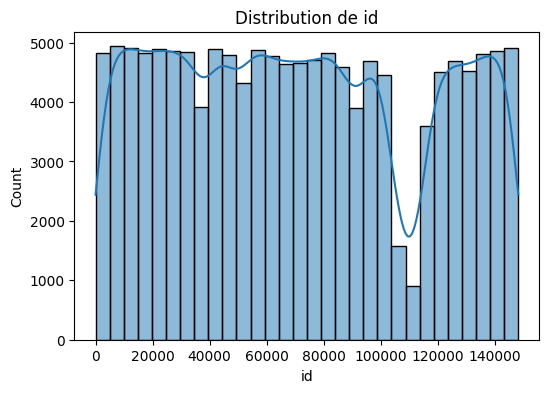

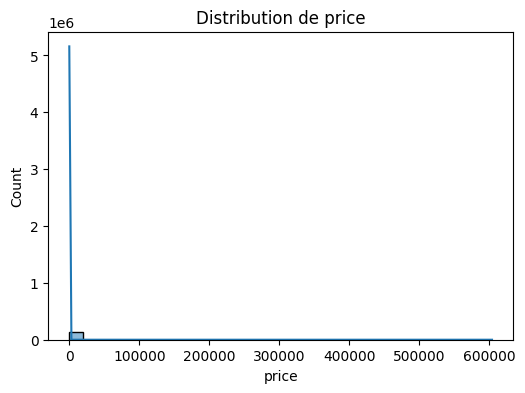

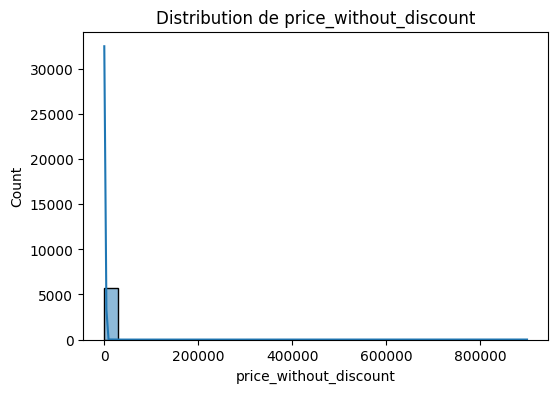

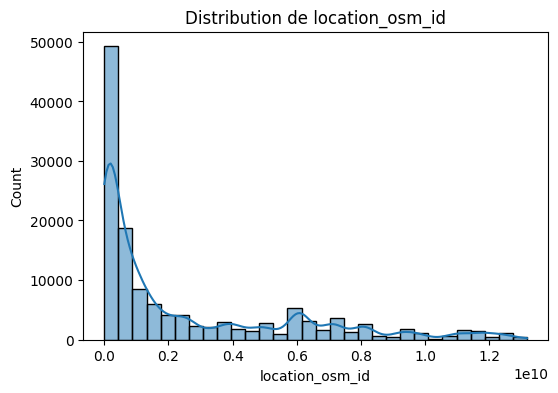

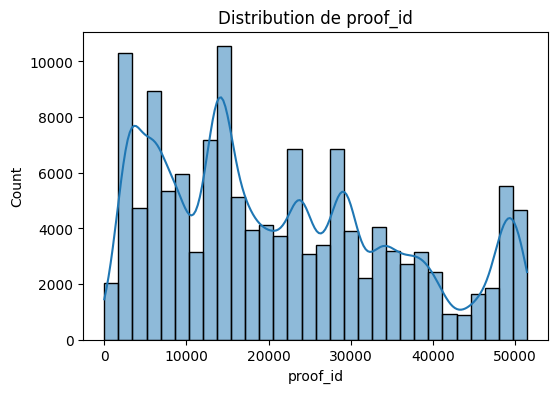

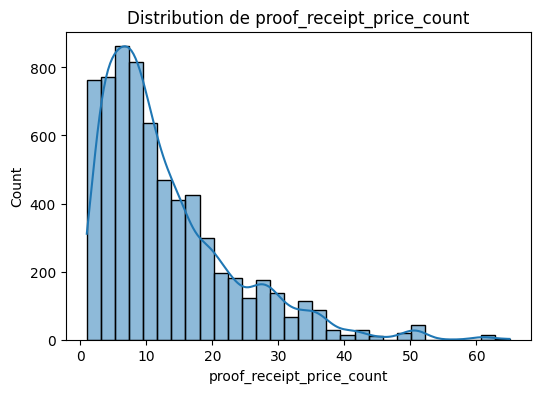

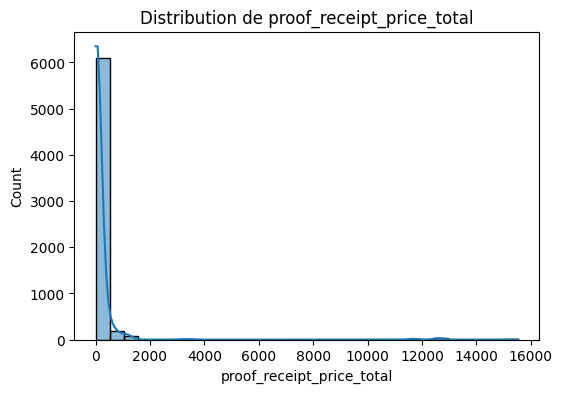

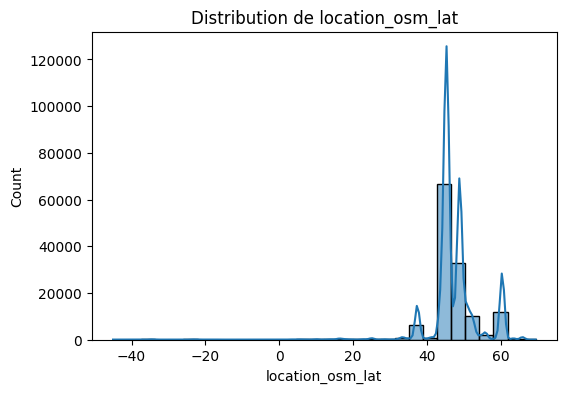

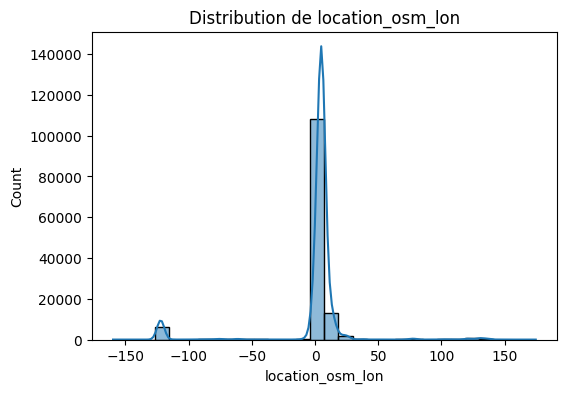

In [21]:
for col in numCols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution de {col}")
    plt.show()


## Analyse variables catégorielles

In [22]:
for col in catCols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts(dropna=False).head(10))



--- type ---
type
PRODUCT     126582
CATEGORY      5858
Name: count, dtype: int64

--- product_code ---
product_code
None             5858
3450970024686     150
3450970006767     137
292475000000      129
3017620422003     118
3270190128717      93
3451790563379      92
3274080001005      90
3523230030793      88
5000168186030      86
Name: count, dtype: int64

--- product_name ---
product_name
None                              58344
                                   1063
BAVETTE ALOYAU X2                   129
NUTELLA                             125
BN PETIT DEJ CEREALE 200G            72
YAOURT FRTS ROUGE 8X125G DELIS       63
PATE A TARTINER                      60
10 DOSETTES NOISETTES 70G PLA        60
CRISTALINE EAU SOUR 6X1,5L PAL       59
*FM BLC PLET FU HALAL X6T 180G       56
Name: count, dtype: int64

--- category_tag ---
category_tag
None            126582
en:bananas         277
en:apples          224
en:tomatoes        204
en:carrots         183
en:oranges         153
en

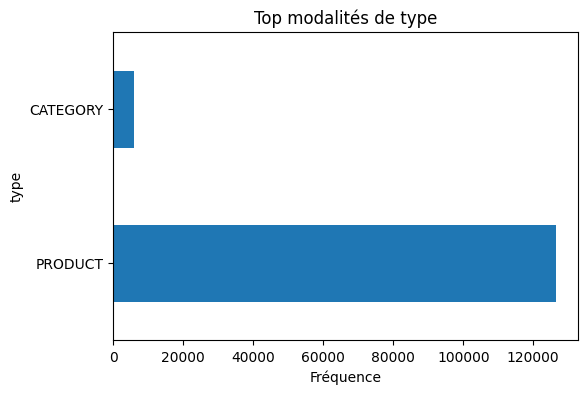

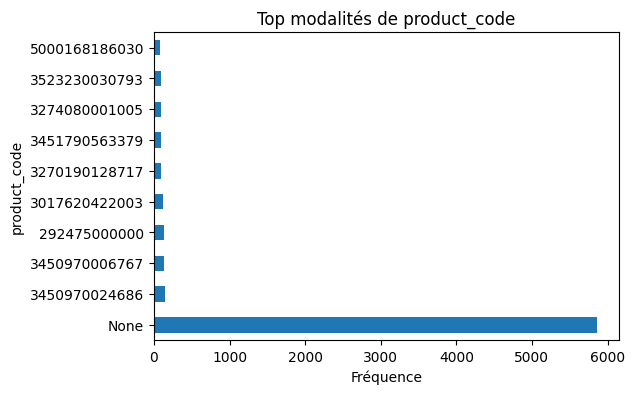

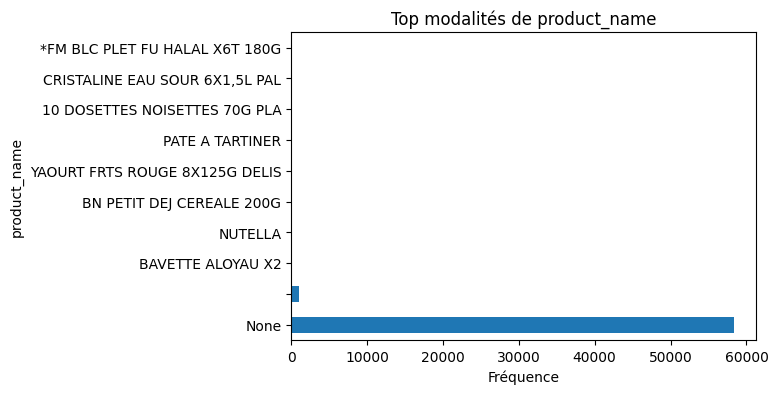

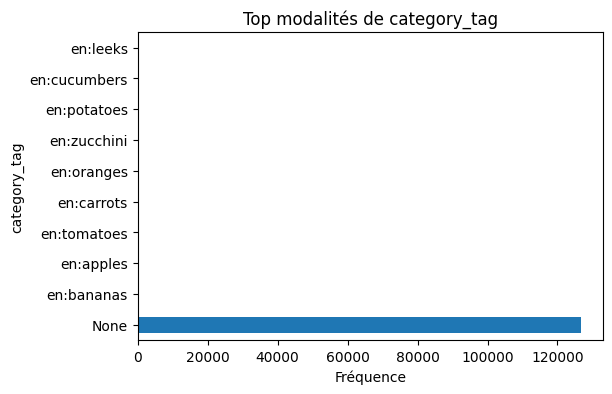

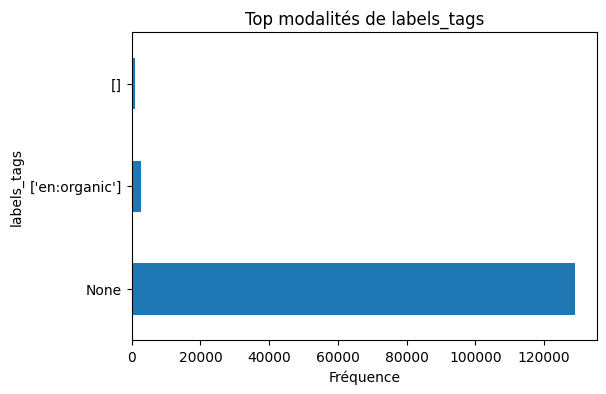

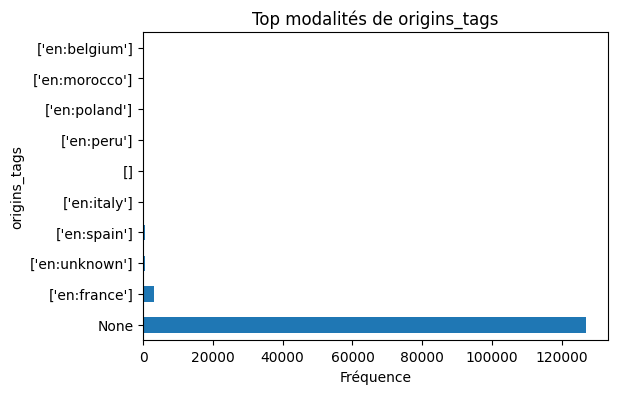

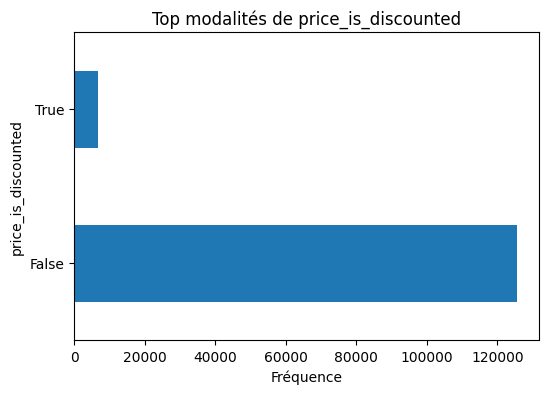

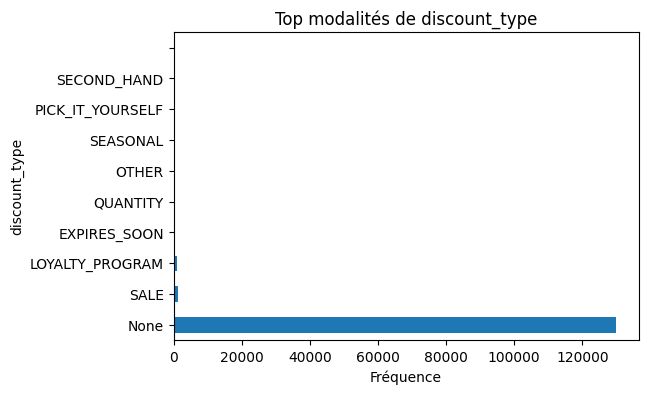

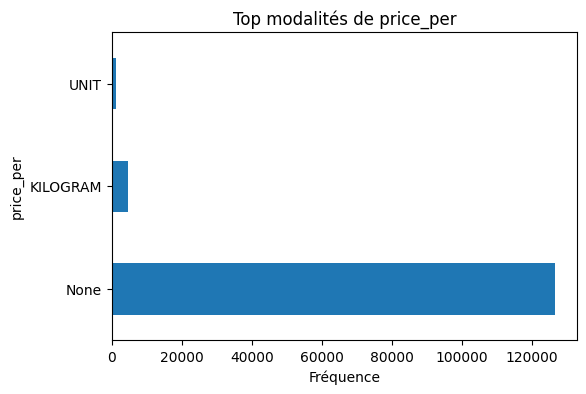

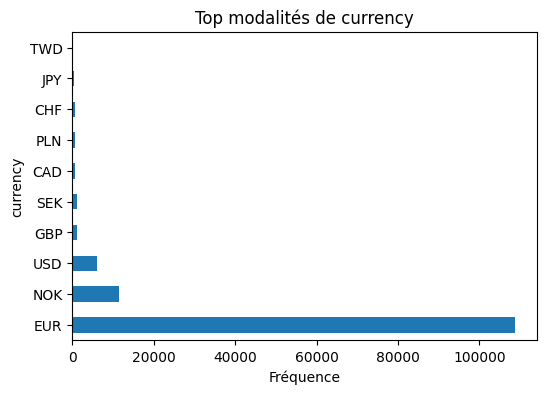

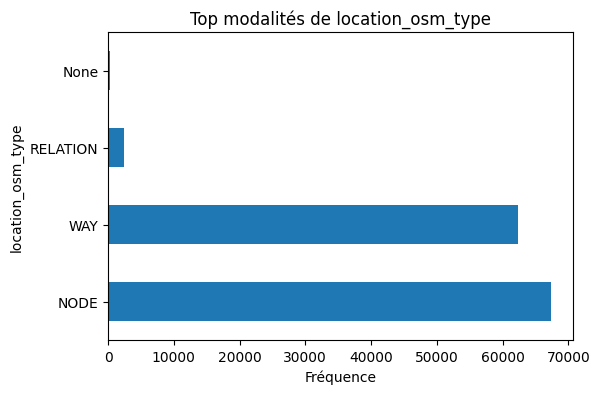

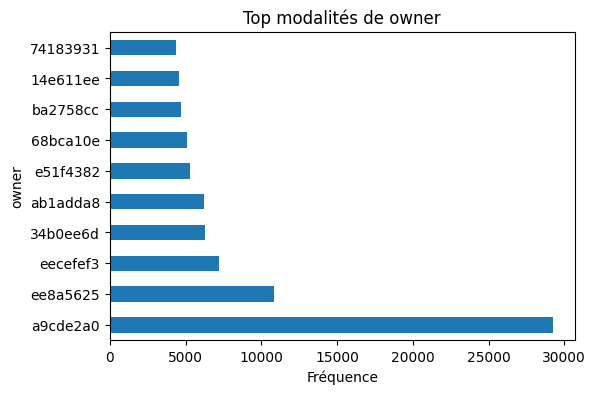

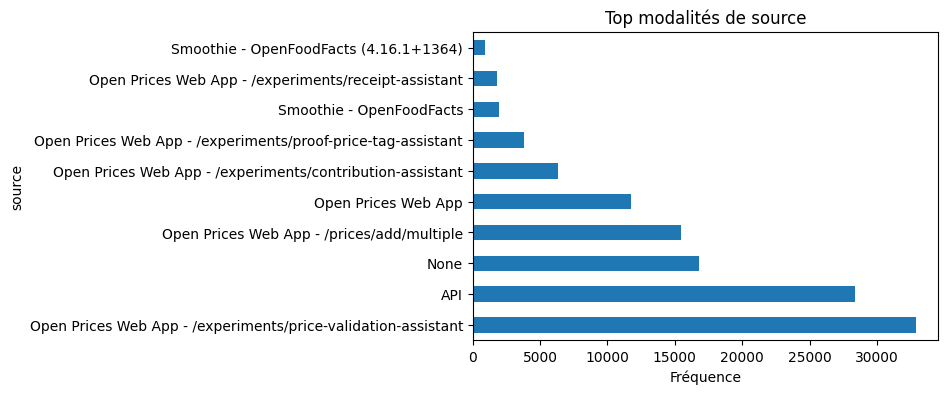

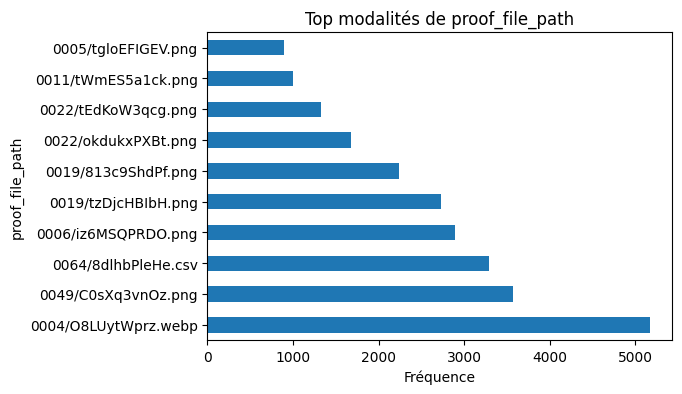

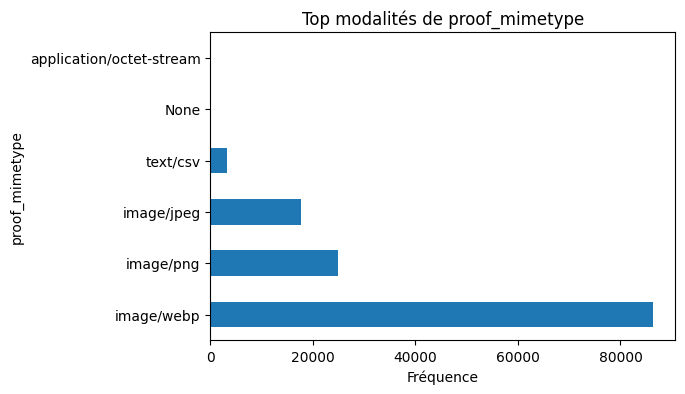

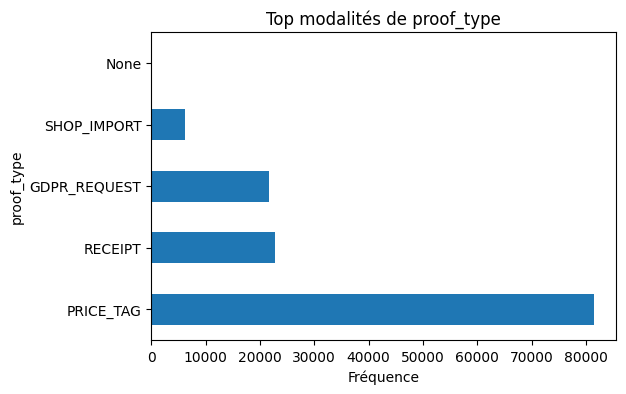

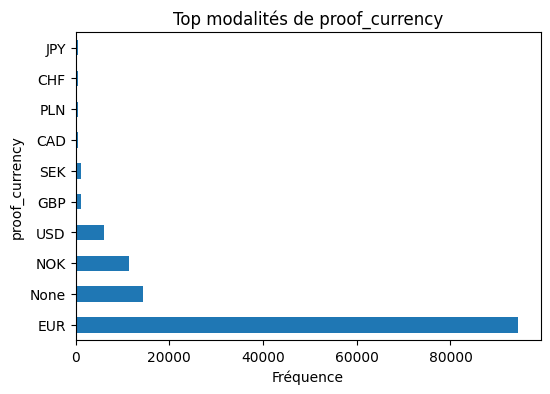

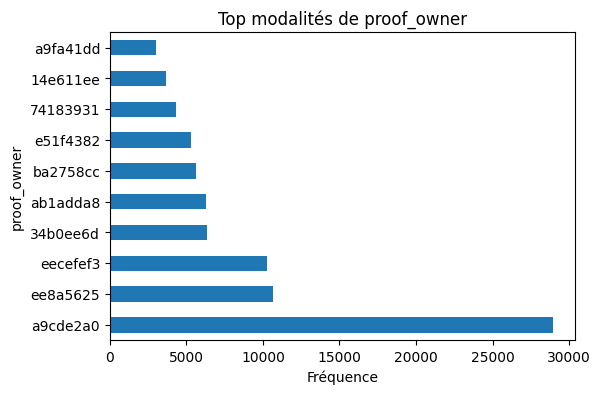

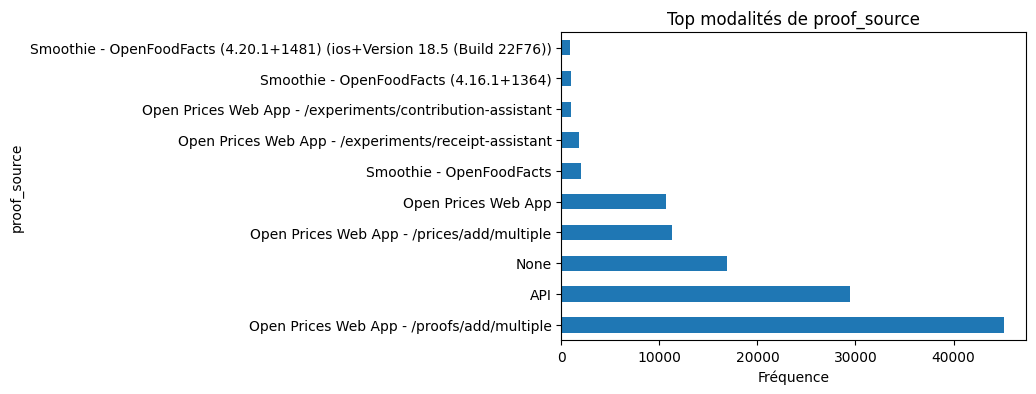

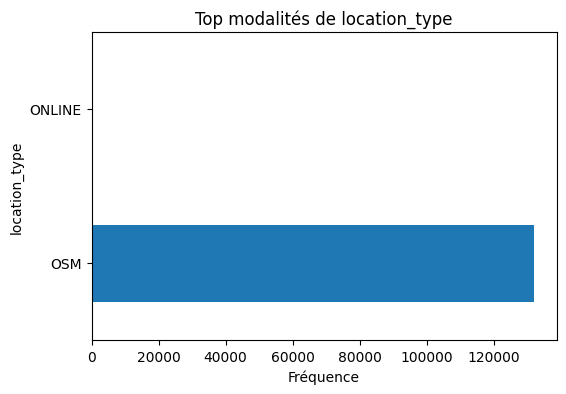

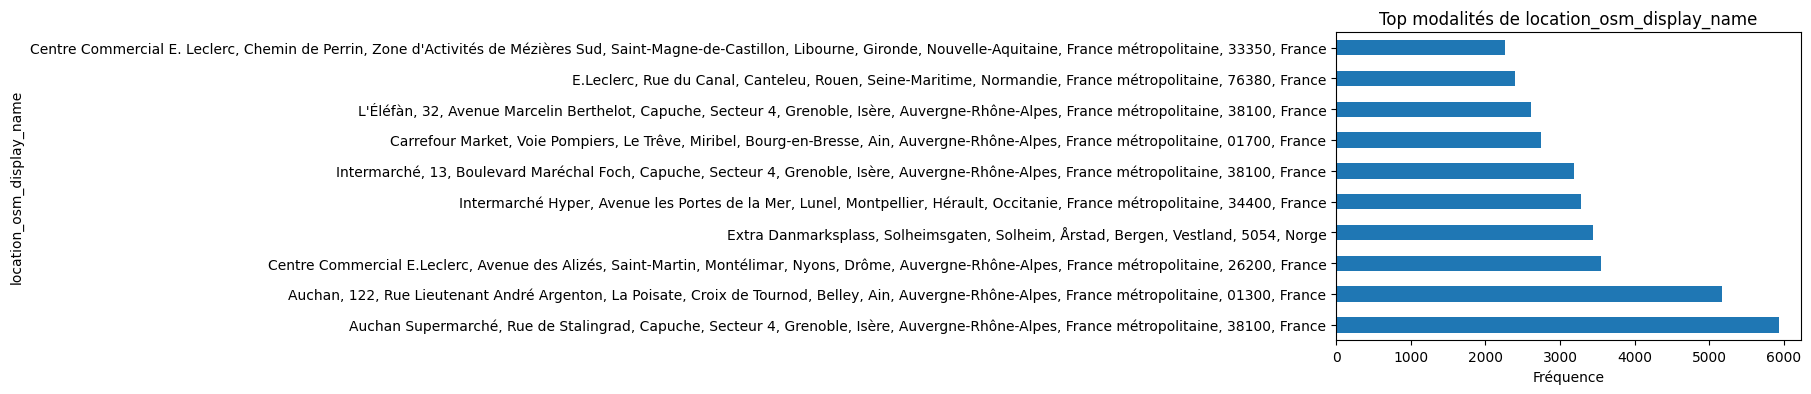

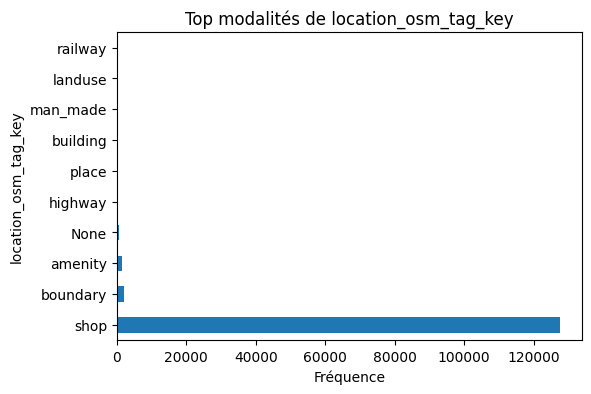

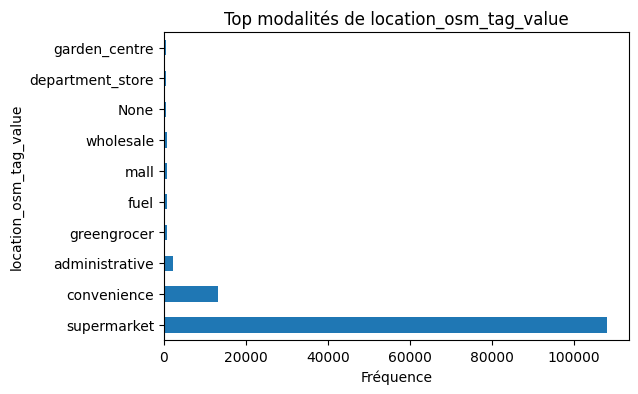

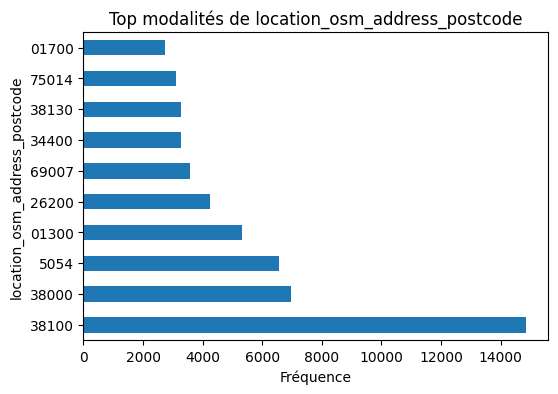

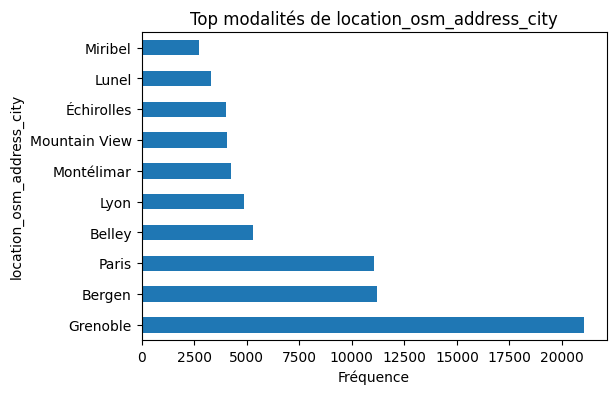

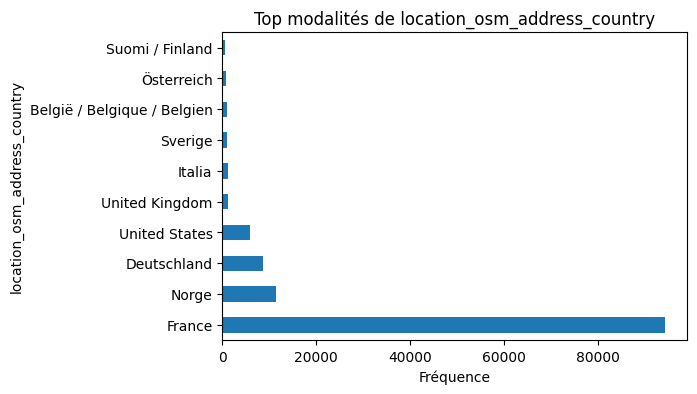

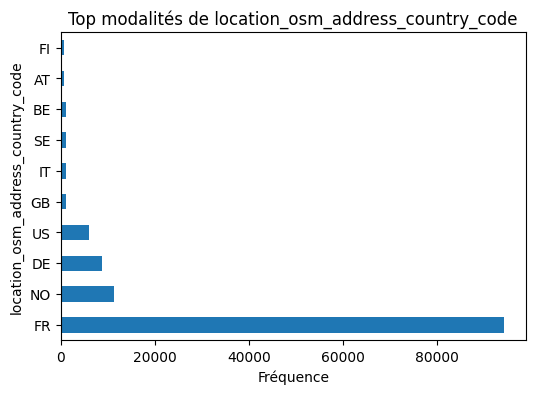

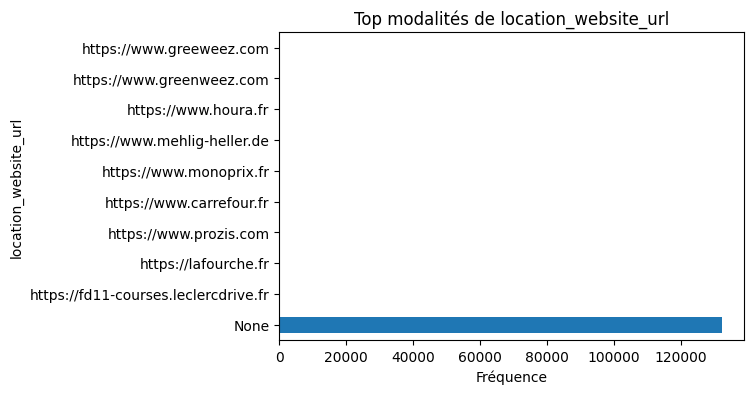

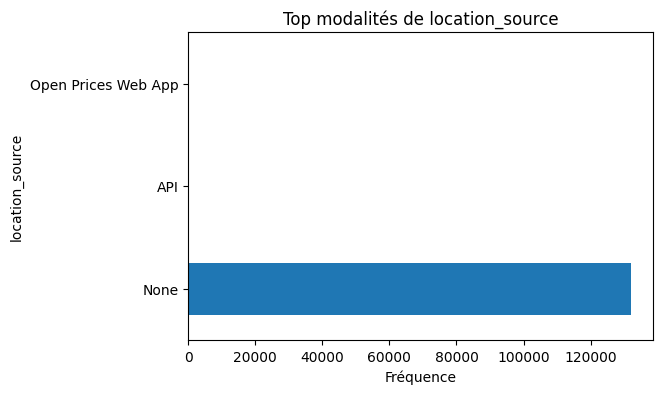

In [23]:
for col in catCols:
    plt.figure(figsize=(6,4))
    df[col].value_counts(dropna=False).head(10).plot(kind='barh')
    plt.title(f"Top modalités de {col}")
    plt.xlabel("Fréquence")
    plt.show()


## Corrélations numériques

In [24]:
dfCorr = df[numCols].corr()

In [25]:
dfCorr

,id,price,price_without_discount,location_osm_id,proof_id,proof_receipt_price_count,proof_receipt_price_total,location_osm_lat,location_osm_lon
id,1.00,0.00,-0.02,0.04,0.98,-0.07,0.05,-0.12,-0.27
price,0.00,1.00,0.43,0.02,0.00,0.14,0.66,-0.04,0.03
price_without_discount,-0.02,0.43,1.00,-0.00,-0.02,0.07,0.40,-0.06,-0.01
location_osm_id,0.04,0.02,-0.00,1.00,0.02,-0.05,-0.01,0.14,0.06
proof_id,0.98,0.00,-0.02,0.02,1.00,-0.06,0.04,-0.14,-0.33
proof_receipt_price_count,-0.07,0.14,0.07,-0.05,-0.06,1.00,0.31,0.17,0.18
proof_receipt_price_total,0.05,0.66,0.40,-0.01,0.04,0.31,1.00,0.09,0.49
location_osm_lat,-0.12,-0.04,-0.06,0.14,-0.14,0.17,0.09,1.00,0.21
location_osm_lon,-0.27,0.03,-0.01,0.06,-0.33,0.18,0.49,0.21,1.00


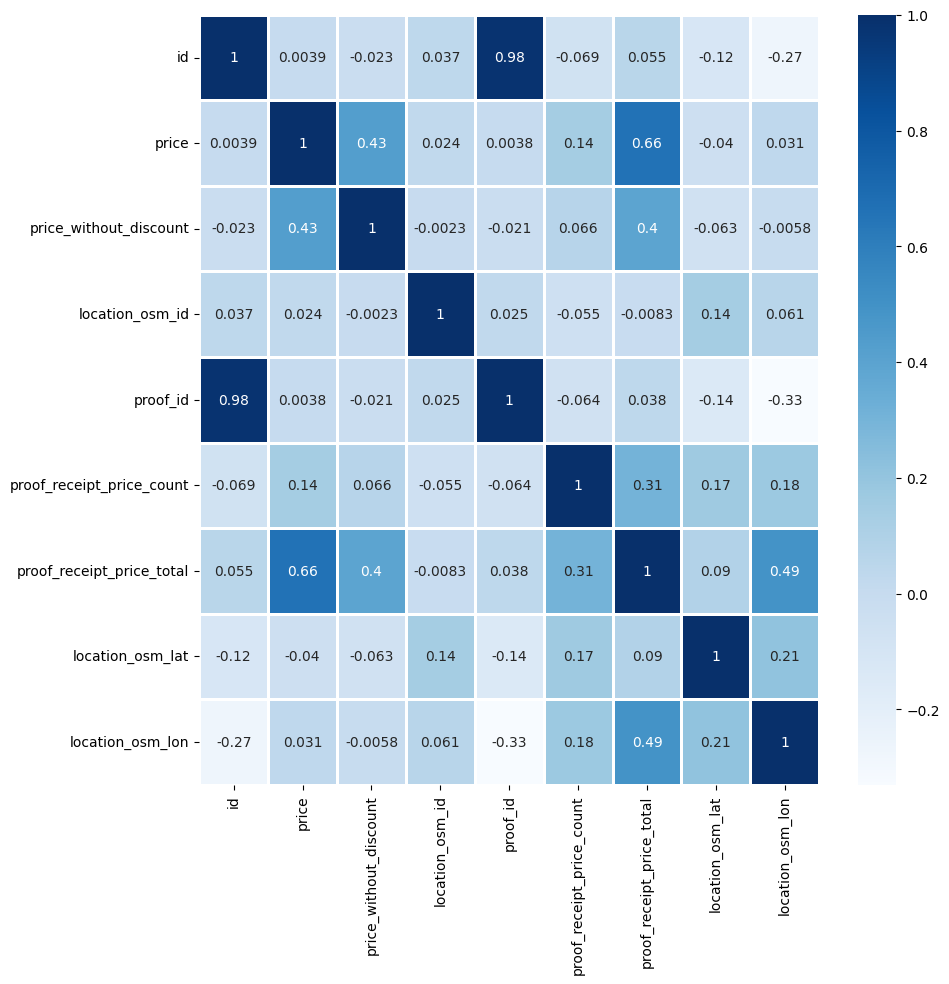

In [26]:
fig, axes = plt.subplots(figsize=(10,10))
sns.heatmap(dfCorr, cmap="Blues", linewidths=.9, annot=True, ax=axes)
plt.show()